In [52]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=10)
X_train.shape, X_test.shape

((140, 4), (10, 4))

In [54]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Точность модели KNN:", accuracy)

Точность модели KNN: 0.9


In [56]:
def get_accuracy(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [57]:
import numpy as np

n_neighbors = np.arange(1, 100)
accuracy = [get_accuracy(n) for n in n_neighbors]

best_n = np.argmax(accuracy) + 1
best_accuracy = accuracy[best_n - 1]

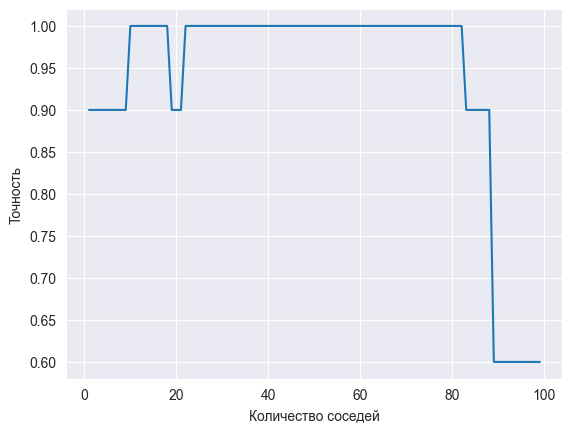

Лучшее количество соседей: 10
Лучшая точность: 1.0


In [58]:
import matplotlib.pyplot as plt

plt.plot(n_neighbors, accuracy)
plt.xlabel('Количество соседей')
plt.ylabel('Точность')
plt.show()

print(f'Лучшее количество соседей: {best_n}')
print(f'Лучшая точность: {best_accuracy}')

In [59]:
random_indices = np.random.choice(len(X_test), size=2, replace=False)
random_objects = X_test.iloc[random_indices]

random_objects = random_objects.values

In [60]:
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(X_train, random_objects, metric='minkowski', p=2)
distances

array([[0.51961524, 1.61554944],
       [0.82462113, 2.12132034],
       [1.1045361 , 0.82462113],
       [3.62215406, 2.46170673],
       [3.52987252, 2.78208555],
       [1.33790882, 3.07408523],
       [0.46904158, 2.07846097],
       [3.90128184, 2.61533937],
       [3.47850543, 2.69443872],
       [3.77491722, 2.71477439],
       [1.78325545, 3.51852242],
       [1.33041347, 2.90688837],
       [0.5       , 2.1       ],
       [3.25269119, 2.28035085],
       [0.45825757, 1.59687194],
       [3.78549865, 2.64764046],
       [0.6       , 1.42126704],
       [0.77459667, 1.2083046 ],
       [0.75498344, 2.39374184],
       [2.87228132, 4.71274867],
       [0.51961524, 2.16101828],
       [0.34641016, 1.72626765],
       [1.64012195, 3.38969025],
       [1.17473401, 2.40831892],
       [0.83666003, 2.23606798],
       [3.73764632, 2.57875939],
       [1.46628783, 3.26036808],
       [1.64316767, 3.40293991],
       [2.96984848, 4.57165178],
       [1.30766968, 3.01164407],
       [3.

In [61]:
import numpy as np

# Задаем количество ближайших соседей, которых мы хотим выбрать (например, k=3)
k = 3

# Инициализируем список для хранения индексов ближайших соседей для каждого объекта
top_k_neighbors = []

# Перебираем каждый объект из random_objects
for i in range(len(random_objects)):
    # Используем argsort для получения индексов соседей, отсортированных по возрастанию расстояний
    neighbor_indices = np.argsort(distances[:, i])

    # Выбираем первые k индексов, исключая сам объект
    k_neighbors = neighbor_indices[1:k + 1]

    # Добавляем индексы ближайших соседей в список top_k_neighbors
    top_k_neighbors.append(k_neighbors)

# В top_k_neighbors теперь будут индексы ближайших k соседей для каждого объекта из random_objects

# Выводим значения ближайших соседей для каждого объекта из random_objects
for i, neighbors in enumerate(top_k_neighbors):
    print(f"Ближайшие соседи для объекта {i + 1}:")
    for j, neighbor_index in enumerate(neighbors):
        neighbor_values = X_train.iloc[neighbor_index]
        print(f"Сосед {j + 1}: {neighbor_values}")
    print()

Ближайшие соседи для объекта 1:
Сосед 1: sepal length (cm)    6.0
sepal width (cm)     2.9
petal length (cm)    4.5
petal width (cm)     1.5
Name: 78, dtype: float64
Сосед 2: sepal length (cm)    6.1
sepal width (cm)     2.8
petal length (cm)    4.7
petal width (cm)     1.2
Name: 73, dtype: float64
Сосед 3: sepal length (cm)    6.2
sepal width (cm)     2.9
petal length (cm)    4.3
petal width (cm)     1.3
Name: 97, dtype: float64

Ближайшие соседи для объекта 2:
Сосед 1: sepal length (cm)    4.9
sepal width (cm)     2.4
petal length (cm)    3.3
petal width (cm)     1.0
Name: 57, dtype: float64
Сосед 2: sepal length (cm)    5.5
sepal width (cm)     2.4
petal length (cm)    3.7
petal width (cm)     1.0
Name: 81, dtype: float64
Сосед 3: sepal length (cm)    5.5
sepal width (cm)     2.4
petal length (cm)    3.8
petal width (cm)     1.1
Name: 80, dtype: float64


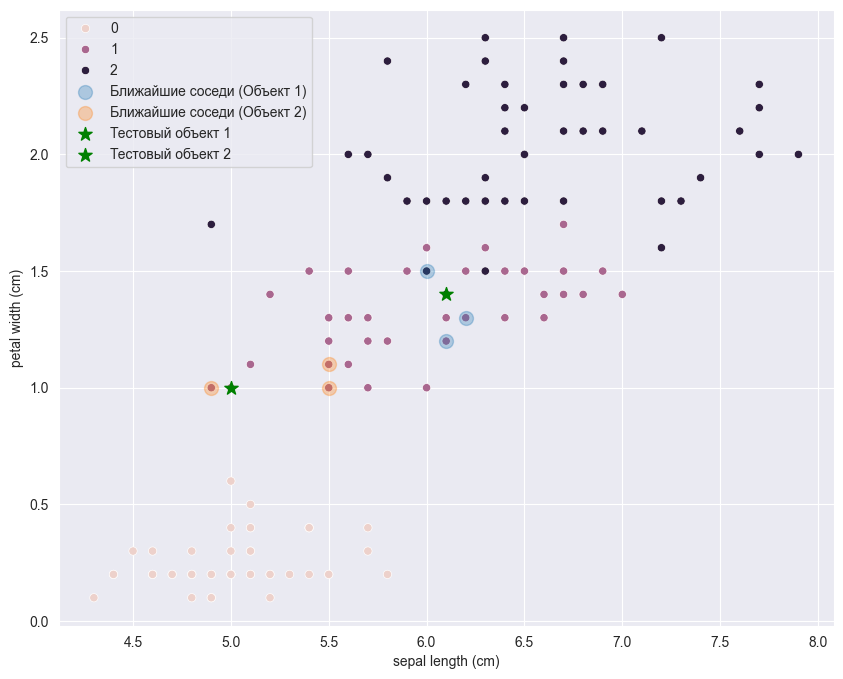

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_train['sepal length (cm)'],
    y=X_train['petal width (cm)'],
    hue=y_train
)

for i, neighbor_indices in enumerate(top_k_neighbors):
    color = f'C{i}'
    plt.scatter(
        X_train.iloc[neighbor_indices]['sepal length (cm)'],
        X_train.iloc[neighbor_indices]['petal width (cm)'],
        color=color,
        alpha=0.3,
        marker='o',
        s=100,
        label=f'Ближайшие соседи (Объект {i + 1})'
    )

for i in range(len(random_objects)):
    plt.scatter(
        random_objects[i, 0],
        random_objects[i, 3],
        color='g',
        marker='*',
        s=100,
        label=f'Тестовый объект {i + 1}'
    )
plt.legend()
plt.show()

In [64]:
print(f'Предсказание для объектов: {knn.predict(random_objects)}')
print(f'Реальные значения: {y_test[random_indices]}')

Предсказание для объектов: [1 1]
Реальные значения: [1 1]


C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [175]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape, X_test.shape

((18576, 8), (2064, 8))

In [177]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train[X_train.columns]), columns=X_train.columns)
X_test = pd.DataFrame(mms.transform(X_test[X_train.columns]), columns=X_train.columns)

In [178]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [179]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратическая ошибка: {mse}")
print(f"Коэффициент детерминации: {r2}")

Среднеквадратическая ошибка: 0.4247012611417403
Коэффициент детерминации: 0.6815399810636454


In [180]:
def get_accuracy_regr(n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'mse': mse, 'r2': r2}

In [181]:
import numpy as np
import pandas as pd

results = pd.DataFrame(columns=['k', 'Среднеквадратическая ошибка', 'Коэффициент детерминации'])

n_neighbors = np.arange(1, 100)
accuracy = [get_accuracy_regr(n) for n in n_neighbors]

for i, a in enumerate(accuracy):
    results.loc[i] = [i + 1, a['mse'], a['r2']]

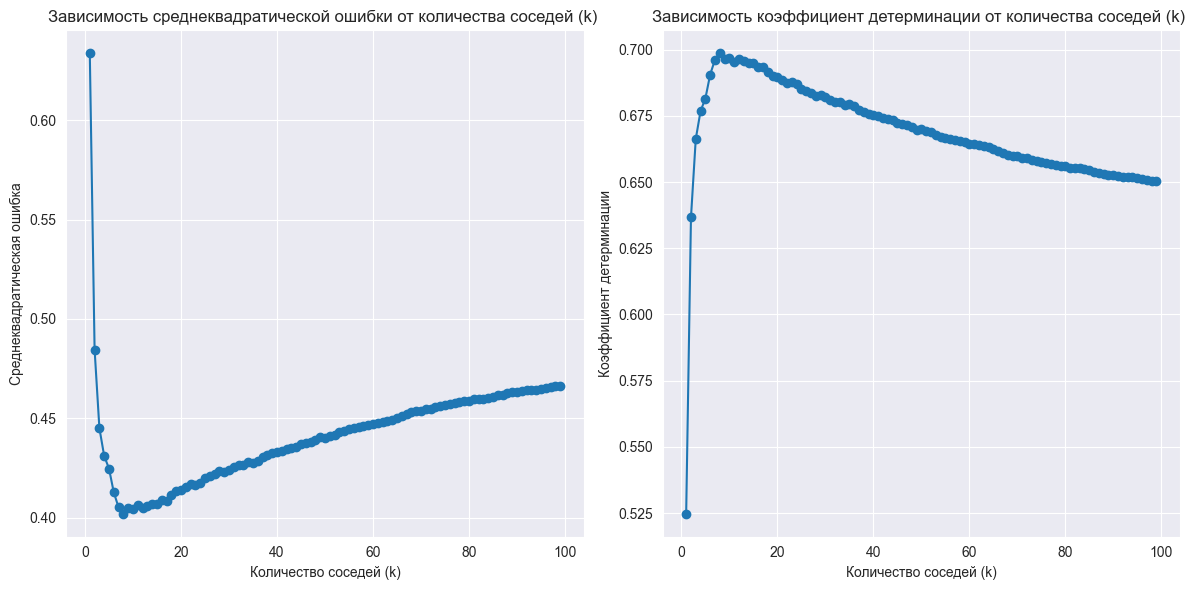

In [182]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(results['k'], results['Среднеквадратическая ошибка'], marker='o')
plt.title('Зависимость среднеквадратической ошибки от количества соседей (k) ')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднеквадратическая ошибка')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results['k'], results['Коэффициент детерминации'], marker='o')
plt.title('Зависимость коэффициент детерминации от количества соседей (k) ')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Коэффициент детерминации')
plt.grid(True)

plt.tight_layout()
plt.show()

In [183]:
best_n_for_mse = results.loc[results["Среднеквадратическая ошибка"].idxmin()]["k"]
best_n_for_r2 = results.loc[results["Коэффициент детерминации"].idxmax()]["k"]
print(f'Оптимальное количество соседей по среднеквадратической ошибке: {best_n_for_mse}')
print(f'Оптимальное количество соседей по коэффициенту детерминации: {best_n_for_r2}')

Оптимальное количество соседей по среднеквадратической ошибке: 8.0
Оптимальное количество соседей по коэффициенту детерминации: 8.0


In [184]:
import numpy as np

random_objects = X_test.sample(n=2)
random_objects

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2014,0.175915,1.00000,0.025389,0.021620,0.035707,0.001662,0.591489,0.210159
515,0.482759,0.27451,0.054820,0.022144,0.044200,0.002131,0.024468,0.741036


In [185]:
distances = pd.DataFrame({
    'object_idx': pd.Series(dtype='int8'),
    'train_idx': pd.Series(dtype='int8'),
    'dst': pd.Series(dtype='float')
})

for test_idx, test_row in random_objects.iterrows():
    for i, train_dot in X_train.iterrows():
        distances.loc[len(distances) + 1] = [test_idx, i, np.linalg.norm(test_row.values - train_dot.values, ord=2)]

distances['object_idx'] = distances['object_idx'].astype('int')
distances['train_idx'] = distances['train_idx'].astype('int')

distances.sort_values('dst').head(5)

,object_idx,train_idx,dst
12025,2014,12024,0.017381
4055,2014,4054,0.019527
6739,2014,6738,0.024030
8105,2014,8104,0.025994
1234,2014,1233,0.026345


In [186]:
for test_idx, test_row in random_objects.iterrows():
    print(distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(5))

       object_idx  train_idx       dst
12025        2014      12024  0.017381
4055         2014       4054  0.019527
6739         2014       6738  0.024030
8105         2014       8104  0.025994
1234         2014       1233  0.026345
       object_idx  train_idx       dst
25333         515       6756  0.033202
26505         515       7928  0.042663
21585         515       3008  0.043427
30032         515      11455  0.048590
25030         515       6453  0.049714


In [187]:
nearest_neigbors_idxs = pd.Series(dtype='int')
test_points_X = []
test_points_Y = []
for test_idx, test_row in random_objects.iterrows():
    test_points_X.append(X_test.loc[test_idx].values[0])
    test_points_Y.append(X_test.loc[test_idx].values[1])
    nearest_neigbors_idxs = pd.concat(
        [nearest_neigbors_idxs,
         distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(5)['train_idx']])
nearest_neigbors_idxs = nearest_neigbors_idxs.values.astype(dtype='int')

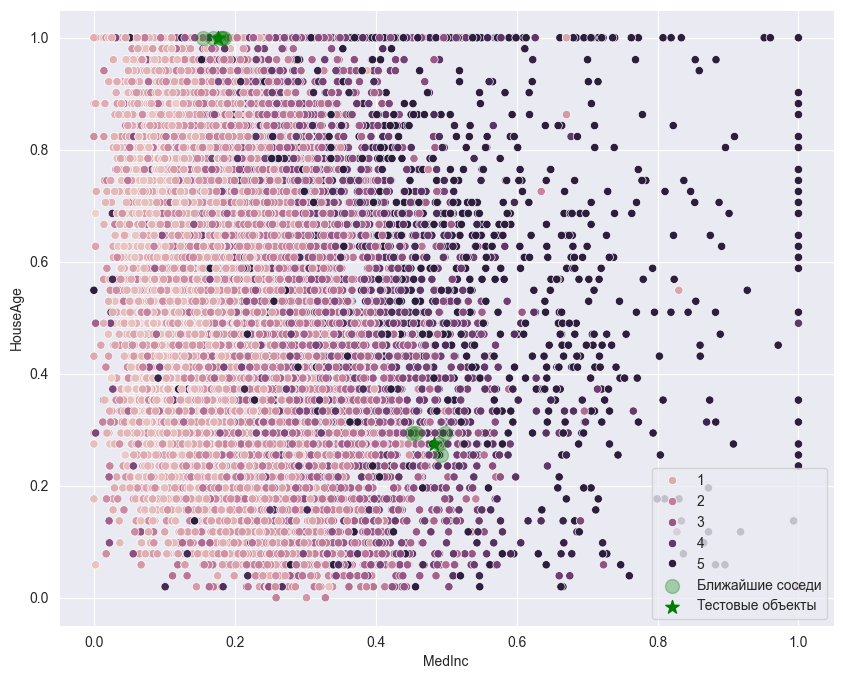

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_train.iloc[:, 0],
    y=X_train.iloc[:, 1],
    hue=y_train,
)

plt.scatter(
    X_train.iloc[:, 0].loc[nearest_neigbors_idxs],
    X_train.iloc[:, 1].loc[nearest_neigbors_idxs],
    c='g',
    alpha=0.3,
    marker='o',
    s=100,
    label='Ближайшие соседи'
)

plt.scatter(
    test_points_X,
    test_points_Y,
    c='g',
    marker='*',
    s=100,
    label='Тестовые объекты'
)
plt.legend()

In [189]:
for test_idx, test_row in random_objects.iterrows():
    idx = X_test.index.to_list().index(test_idx)
    real_value = y_test[idx]
    prdicted_values = []
    neigbors = distances[distances['object_idx'] == test_idx].sort_values(['dst']).head(5)['train_idx']
    for train_idx in neigbors:
        prdicted_values.append(y_train[X_train.index.to_list().index(train_idx)])
    print('Реальное значение:', real_value, '–', 'Предсказанное значение:', np.mean(prdicted_values).round(3))

Реальное значение: 1.073 – Предсказанное значение: 1.701
Реальное значение: 3.164 – Предсказанное значение: 3.116


In [203]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [204]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [205]:
X_selected = X[['sepal length (cm)', 'petal width (cm)']]
X_selected.head()

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2


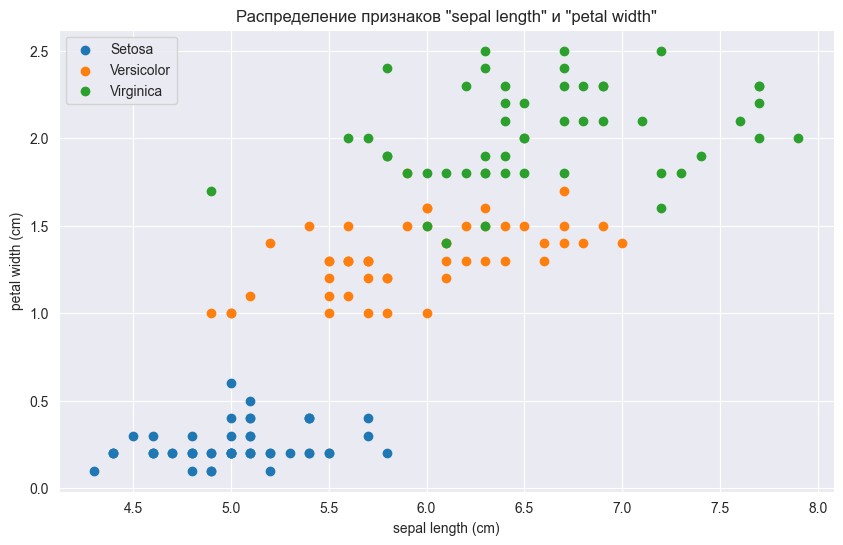

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.scatter(
        X_selected[y == i]['sepal length (cm)'],
        X_selected[y == i]['petal width (cm)'],
        label=f'Iris {i}'
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Распределение признаков "sepal length" и "petal width"')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

plt.show()

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.10, random_state=42)

print(X_train.shape, X_test.shape)

(135, 2) (15, 2)


In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [209]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Точность модели KNN на тестовом наборе:", accuracy)

Точность модели KNN на тестовом наборе: 0.9333333333333333


In [210]:
from sklearn.metrics import pairwise_distances

random_test_object = X_test.sample(n=1, random_state=42)

distances = pairwise_distances(random_test_object, X_train, metric='euclidean')

In [211]:
import numpy as np

k = 50
neighbor_indices = np.argsort(distances[0])
k_neighbors = neighbor_indices[1:k + 1]

print(f"Индексы ближайших соседей:", k_neighbors)

Индексы ближайших соседей: [ 51 123  35   3  40  49 110   2 103  59 108 101 130  80  62  68  30  83
 105  78  94  37  54  26  77  60 125  88  31 128  74 126  57 104   0   6
  21  25  58  75  96  95 122  45 107  16  55  64  44 127]


In [216]:
neighbor_labels = y_train[k_neighbors]
label_counts = np.bincount(neighbor_labels)
print(f"Финальное предсказание для выбранного тестового объекта: {np.argmax(label_counts)}")

Финальное предсказание для выбранного тестового объекта: 1


In [217]:
knn_prediction = knn.predict(random_test_object)
actual_label = y_test[X_test.index.isin(random_test_object.index)][0]

print(f"Предсказание модели sklearn: {knn_prediction}")
print(f"Реальное значение: {actual_label}")

Предсказание модели sklearn: [1]
Реальное значение: 1


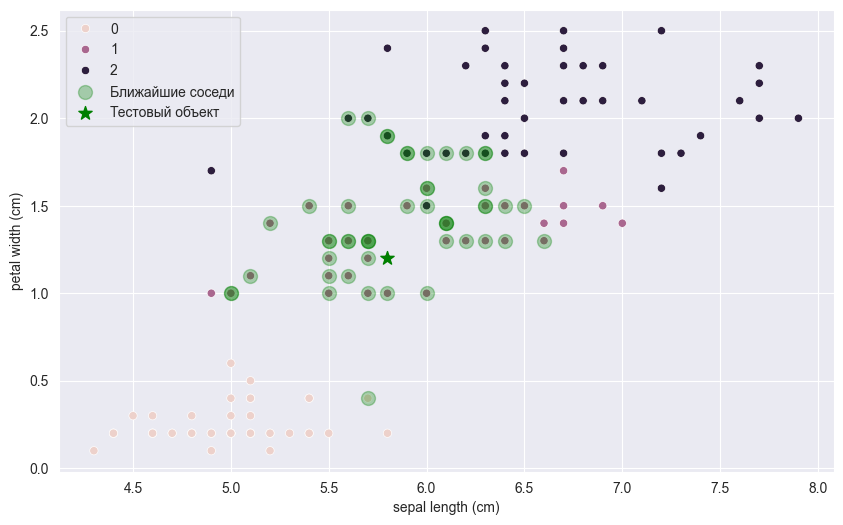

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=X_train['sepal length (cm)'],
    y=X_train['petal width (cm)'],
    hue=y_train
)

plt.scatter(
    X_train.iloc[k_neighbors]['sepal length (cm)'],
    X_train.iloc[k_neighbors]['petal width (cm)'],
    color='g',
    alpha=0.3,
    marker='o',
    s=100,
    label='Ближайшие соседи'
)

plt.scatter(
    random_test_object['sepal length (cm)'],
    random_test_object['petal width (cm)'],
    color='g',
    marker='*',
    s=100,
    label='Тестовый объект'
)

plt.legend()
plt.show()

In [219]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_weighted.fit(X_train[['sepal length (cm)', 'petal width (cm)']], y_train)
y_pred_weighted = knn_weighted.predict(X_test[['sepal length (cm)', 'petal width (cm)']])

In [220]:
accuracy_weighted = knn_weighted.score(X_test[['sepal length (cm)', 'petal width (cm)']], y_test)
print(f"Accuracy (взвешенный KNN): {accuracy_weighted:.2f}")

Accuracy (взвешенный KNN): 0.93


In [221]:
from sklearn.metrics import pairwise_distances

random_test_object = X_test.sample(n=1, random_state=42)
distances = pairwise_distances(random_test_object, X_train, metric='euclidean')

In [222]:
import numpy as np

k = 50
neighbor_indices = np.argsort(distances[0])

k_neighbors = neighbor_indices[1:k + 1]
print(f"Индексы ближайших {k} соседей:", k_neighbors)

Индексы ближайших 50 соседей: [ 51 123  35   3  40  49 110   2 103  59 108 101 130  80  62  68  30  83
 105  78  94  37  54  26  77  60 125  88  31 128  74 126  57 104   0   6
  21  25  58  75  96  95 122  45 107  16  55  64  44 127]


In [223]:
weights = 1 / distances[0][k_neighbors]
print(f"Веса для каждого соседа: {weights}")

Веса для каждого соседа: [10.          7.07106781  7.07106781  7.07106781  5.          4.47213595
  4.47213595  4.47213595  4.47213595  3.53553391  3.33333333  3.16227766
  3.16227766  3.16227766  3.16227766  3.16227766  2.77350098  2.77350098
  2.77350098  2.77350098  2.77350098  2.77350098  2.42535625  2.23606798
  2.23606798  2.          1.96116135  1.71498585  1.71498585  1.64398987
  1.64398987  1.64398987  1.58113883  1.58113883  1.56173762  1.49071198
  1.49071198  1.42857143  1.42857143  1.41421356  1.38675049  1.31306433
  1.2803688   1.2803688   1.24034735  1.24034735  1.24034735  1.21267813
  1.21267813  1.21267813]


In [224]:
weighted_prediction = np.average(y_train[k_neighbors], weights=weights)
final_prediction = round(weighted_prediction)
print(f"Финальное предсказание: {final_prediction}")

Финальное предсказание: 1


In [225]:
print(f'Предсказанное вручную: {final_prediction}')
print(f'Предсказанное моделью: {knn_weighted.predict(random_test_object)[0]}')
print(f'Настоящее целевое значение: {y_train[random_test_object.index[0]]}')

Предсказанное вручную: 1
Предсказанное моделью: 1
Настоящее целевое значение: 0


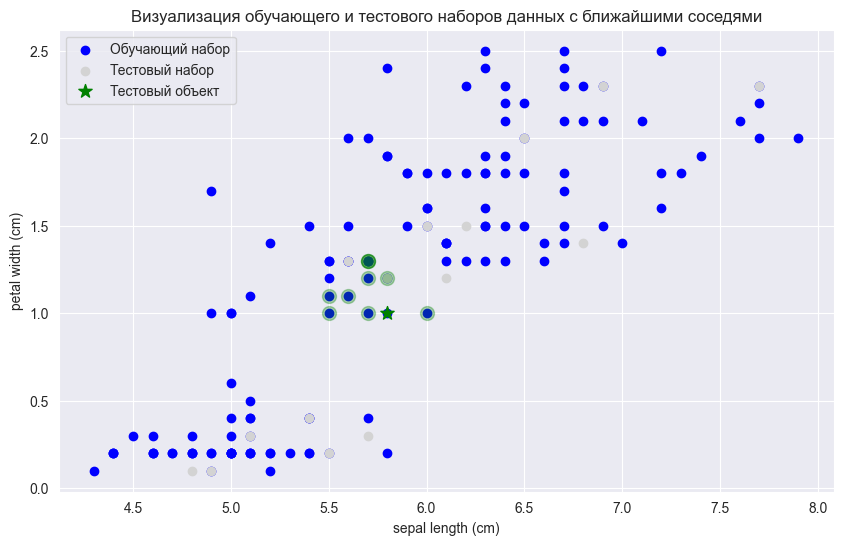

In [233]:
def process_nearest_neighbors(test_object, k=50):
    distances = pairwise_distances(test_object, X_train, metric='euclidean')
    neighbor_indices = np.argsort(distances[0])
    k_neighbors = neighbor_indices[1:k + 1]

    return k_neighbors


def show_dist_plot(object_index, neighbors_count):
    test_object = X_train.iloc[object_index].to_frame().T
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    axes.set_xlabel('sepal length (cm)')
    axes.set_ylabel('petal width (cm)')
    axes.set_title('Визуализация обучающего и тестового наборов данных с ближайшими соседями')
    axes.scatter(
        X_train['sepal length (cm)'],
        X_train['petal width (cm)'],
        color='blue',
        label='Обучающий набор'
    )
    axes.scatter(
        X_test['sepal length (cm)'],
        X_test['petal width (cm)'],
        color='lightgray',
        label='Тестовый набор'
    )
    axes.scatter(
        test_object['sepal length (cm)'],
        test_object['petal width (cm)'],
        c='g',
        marker='*',
        s=100,
        label='Тестовый объект'
    )
    k_neighbors = process_nearest_neighbors(test_object, neighbors_count)
    for neighbor_index in k_neighbors:
        neighbor_values = X_train.iloc[neighbor_index]
        axes.scatter(
            neighbor_values['sepal length (cm)'],
            neighbor_values['petal width (cm)'],
            c='g',
            marker='o',
            alpha=0.3,
            s=100
        )
    plt.legend()
    plt.show()


object_index = 40
neighbors_count = 10

show_dist_plot(object_index, neighbors_count)

In [234]:
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd


data = fetch_olivetti_faces(shuffle=True, random_state=9)

X = pd.DataFrame(data['data'])
y = data['target']

X.head()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Prokhor\scikit_learn_data


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.723140,0.710744,0.714876,0.731405,0.735537,0.752066,0.772727,0.793388,0.814050,0.834711,...,0.793388,0.904959,0.549587,0.409091,0.491736,0.487603,0.471074,0.483471,0.475207,0.475207
1,0.289256,0.157025,0.148760,0.190083,0.169421,0.194215,0.404959,0.607438,0.669421,0.677686,...,0.438017,0.400826,0.421488,0.429752,0.433884,0.425620,0.438017,0.438017,0.210744,0.206612
2,0.586777,0.595041,0.681818,0.694215,0.714876,0.698347,0.714876,0.727273,0.743802,0.739669,...,0.495868,0.380165,0.400826,0.330579,0.148760,0.119835,0.123967,0.115702,0.119835,0.107438
3,0.235537,0.351240,0.479339,0.545455,0.566116,0.566116,0.595041,0.607438,0.619835,0.623967,...,0.169421,0.198347,0.202479,0.214876,0.202479,0.214876,0.214876,0.214876,0.210744,0.206612
4,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893


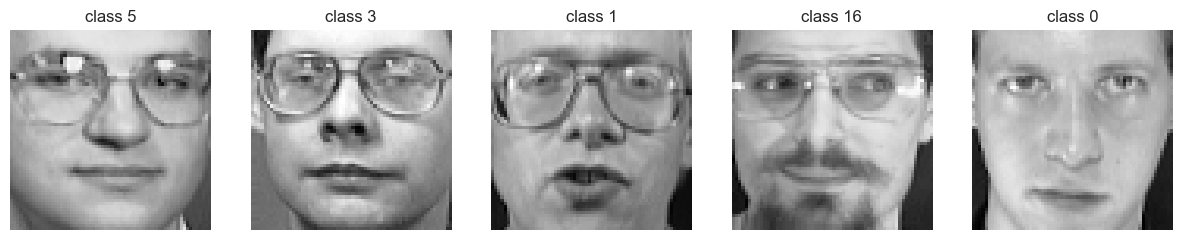

In [235]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(0, 5):
    ax[i].imshow(X.iloc[i].values.reshape((64, 64)), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'class {y[i]}')

plt.show()

In [236]:
y

array([ 5,  3,  1, 16,  0,  1, 12,  9, 26, 37, 20,  5, 10, 27, 10, 34, 13,
       26, 17, 31,  9,  7, 31, 37, 31, 35, 18, 29, 29,  4, 21, 20, 23,  7,
        9, 18, 22,  2,  1, 39, 36,  8, 34, 32,  3, 20,  3,  9, 37, 32, 34,
       15,  9, 16, 36, 16, 13,  7, 29,  6, 13,  4, 16,  0,  8,  1, 25,  3,
       18, 29,  8, 35,  2, 25, 21, 31, 35, 23, 30, 28,  4, 10, 11, 27, 29,
       39,  5, 12, 29, 26, 15,  2, 39,  6, 30, 37, 25, 32, 35, 24, 15, 24,
        2, 19, 22,  0, 38,  5, 22, 28,  6, 38,  6,  3, 33, 12, 36,  8, 27,
       19, 25, 36, 10, 37,  9, 33, 10, 28, 32, 34, 17, 23, 19, 24, 27,  3,
       39, 30,  3,  7,  3, 30, 12, 21, 17, 14, 35, 21, 19,  5, 32, 16, 19,
        8, 33, 14, 17, 15, 22, 38, 15, 18,  7, 14, 28, 39, 23, 36, 28, 10,
       39, 36, 37, 10, 34, 25, 18, 13, 19, 33, 33, 13, 26,  9, 13, 34, 24,
        0, 30, 23,  2, 22,  9, 11,  7, 35, 19, 26, 32, 11,  7,  7,  0,  4,
        0,  2,  0, 26, 21, 14,  4, 32,  1, 23, 16,  0,  7, 14, 16, 15, 39,
       17, 33, 30, 37, 17

In [237]:
from sklearn.model_selection import train_test_split

# X_train - матрица признаков для обучения
# y_train - вектор целевых значений для обучения
# X_test - матрица признаков для тестирования
# y_test - вектор целевых значений для тестирования

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=50)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [239]:
from sklearn.metrics import accuracy_score

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN с 50 соседями: {accuracy.round(2)}')

Точность модели KNN с 50 соседями: 0.3


In [240]:
from sklearn.neighbors import KNeighborsClassifier

knn_weighted_classifier = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn_weighted_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

In [242]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn_weighted_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN с 50 соседями: {accuracy.round(2)}')

class_report = classification_report(y_test, y_pred, zero_division=1)
print('Отчет о классификации:')
print(class_report)

Точность модели KNN с 50 соседями: 0.54
Отчет о классификации:
              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      0.00      0.00         3
           3       1.00      0.00      0.00         3
           4       0.00      0.00      1.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       0.29      1.00      0.44         2
           9       1.00      1.00      1.00         1
          10       0.67      1.00      0.80         2
          11       1.00      0.00      0.00         6
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       0.12      1.00      0.22         1
          16       1.00      0.00      0.00         1
          17       0.40      1.00      0.57         2
          18      

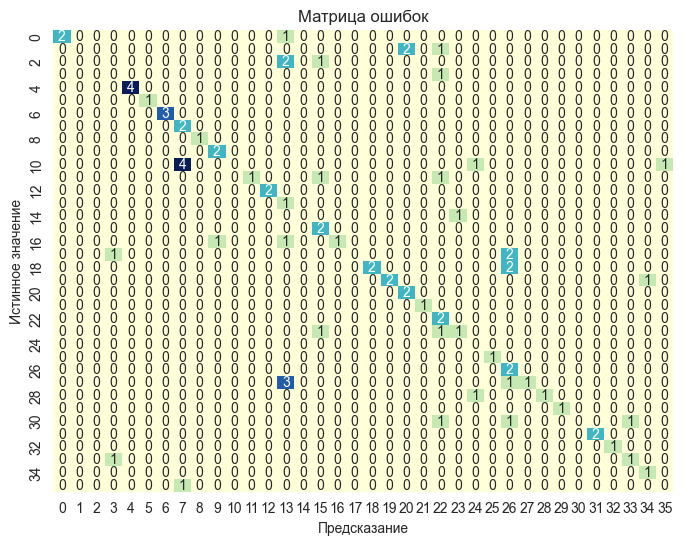

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('Предсказание')
plt.ylabel('Истинное значение')
plt.title('Матрица ошибок')
plt.show()

In [244]:
import numpy as np

def custom_distance_weight(distances):
    epsilon = 1e-6
    weights = 1.0 / (distances ** 2 + epsilon)
    return weights

In [245]:
from sklearn.neighbors import KNeighborsClassifier

knn_custom_weighted = KNeighborsClassifier(n_neighbors=50, weights=custom_distance_weight)
knn_custom_weighted.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50,
                     weights=<function custom_distance_weight at 0x0000011A3EF1B2E0>)

In [247]:
y_pred_custom_weighted = knn_custom_weighted.predict(X_test)
accuracy_custom_weighted = accuracy_score(y_test, y_pred_custom_weighted)
print(f'Точность пользовательской модели KNN с весами: {accuracy_custom_weighted.round(2)}')

Точность пользовательской модели KNN с весами: 0.66


In [249]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [250]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [251]:
X_selected = X[['MedInc']][:1000]

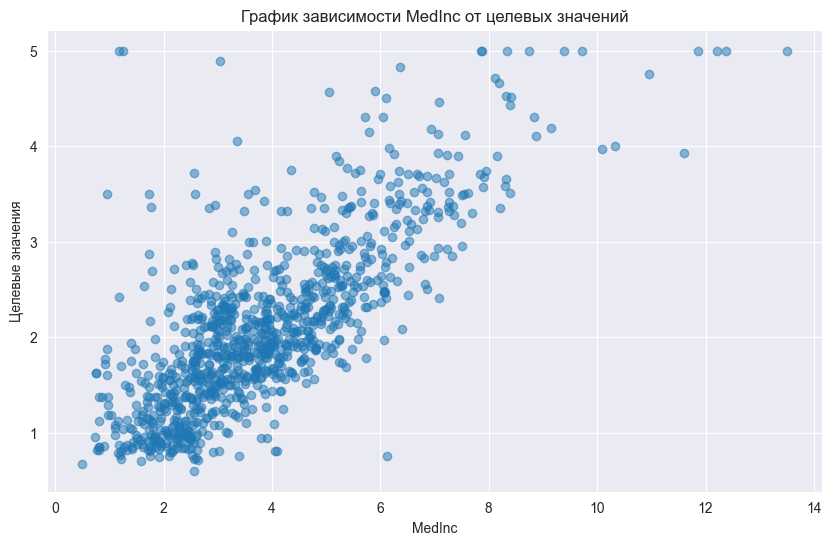

In [252]:
import matplotlib.pyplot as plt

MedInc_values = X_selected['MedInc'].values
y_values = y[:1000]

# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(MedInc_values, y_values, alpha=0.5)
plt.title('График зависимости MedInc от целевых значений')
plt.xlabel('MedInc')
plt.ylabel('Целевые значения')
plt.grid(True)
plt.show()

In [253]:
from sklearn.model_selection import train_test_split

# X_train - матрица признаков для обучения
# y_train - вектор целевых значений для обучения
# X_test - матрица признаков для тестирования
# y_test - вектор целевых значений для тестирования
X_train, X_test, y_train, y_test = train_test_split(X_selected, y[:1000], test_size=0.1, random_state=42)

In [254]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=100)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [255]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Среднеквадратичная ошибка (MSE): {mse.round(2)}')
print(f'Средняя абсолютная ошибка (MAE): {mae.round(2)}')

Среднеквадратичная ошибка (MSE): 0.28
Средняя абсолютная ошибка (MAE): 0.41


In [256]:
from sklearn.metrics import pairwise_distances

X_train_array = X_train.values
X_test_array = X_test.values

random_test_sample = X_test_array[np.random.randint(0, len(X_test_array))]

distances = pairwise_distances([random_test_sample], X_train_array, metric='euclidean')
distances

array([[6.71500e-01, 5.63500e-01, 2.00810e+00, 8.15300e-01, 3.88600e-01,
        3.83390e+00, 2.00700e-01, 1.33300e+00, 7.58400e-01, 2.00670e+00,
        3.77400e-01, 1.78600e-01, 2.56600e+00, 1.21000e+00, 2.09870e+00,
        3.08000e-02, 6.82800e-01, 3.99340e+00, 8.68700e-01, 3.20100e-01,
        2.68530e+00, 1.20560e+00, 7.40000e-01, 4.64100e-01, 4.56700e-01,
        4.00500e-01, 2.54370e+00, 4.07300e-01, 3.48580e+00, 5.94900e-01,
        4.43000e-01, 2.26710e+00, 2.00700e-01, 1.78670e+00, 1.23410e+00,
        1.66440e+00, 2.88030e+00, 2.78800e-01, 6.71900e-01, 1.32570e+00,
        6.32000e-02, 2.74200e-01, 4.98500e-01, 3.67700e+00, 1.58840e+00,
        1.96660e+00, 7.36800e-01, 6.85100e-01, 2.85400e-01, 1.12780e+00,
        7.36800e-01, 4.43230e+00, 7.87490e+00, 1.11550e+00, 1.99820e+00,
        1.32930e+00, 1.02010e+00, 4.29300e-01, 3.17200e-01, 1.55920e+00,
        1.74800e+00, 2.55400e-01, 4.39900e-01, 9.27000e-02, 2.55200e+00,
        8.10700e-01, 7.84000e-01, 3.96700e-01, 1.86

In [257]:
k = 5

k_nearest_indices = np.argsort(distances[0])[:k]

print(f"Индексы {k} ближайших соседей:")
print(k_nearest_indices)

Индексы 5 ближайших соседей:
[335 813 259 284 736]


In [258]:
k_nearest_targets = y_train[k_nearest_indices]

final_prediction = np.mean(k_nearest_targets)

print(f"Финальное предсказание для объекта: {final_prediction.round(2)}")

Финальное предсказание для объекта: 2.18


In [259]:
knn_model_prediction = knn_regressor.predict([random_test_sample])[0]
final_prediction = np.mean(k_nearest_targets)
true_target_value = y_test[np.random.randint(0, len(X_test))]

print(f"Настоящее целевое значение: {true_target_value.round(2)}")
print(f"Предсказание модели KNN: {knn_model_prediction.round(2)}")
print(f"Финальное предсказание на основе KNN: {final_prediction.round(2)}")

abs_error_model = np.abs(true_target_value - knn_model_prediction)
abs_error_final = np.abs(true_target_value - final_prediction)

print(f"Абсолютная ошибка модели KNN: {abs_error_model.round(2)}")
print(f"Абсолютная ошибка финального предсказания: {abs_error_final.round(2)}")

Настоящее целевое значение: 1.51
Предсказание модели KNN: 1.97
Финальное предсказание на основе KNN: 2.18
Абсолютная ошибка модели KNN: 0.46
Абсолютная ошибка финального предсказания: 0.67


C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


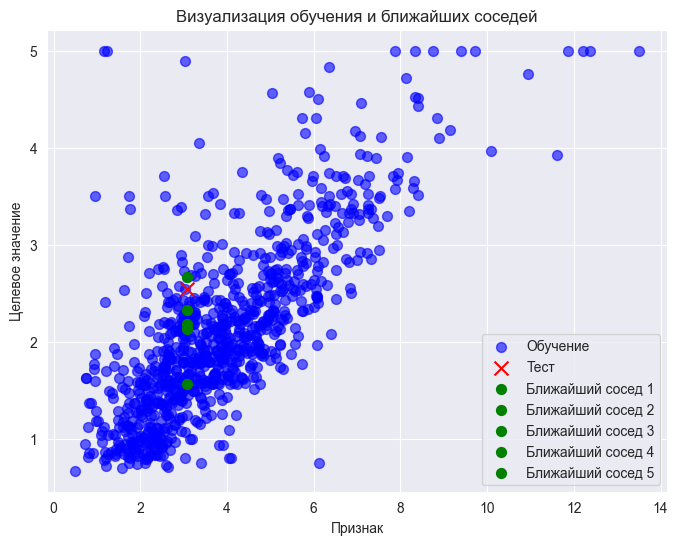

In [260]:
import matplotlib.pyplot as plt

k = 5
k_nearest_indices = np.argsort(distances)[:k]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_train_array[:, 0], 
    y_train, 
    c='blue', 
    label='Обучение', 
    s=50, 
    alpha=0.6
)
plt.scatter(
    random_test_sample[0], 
    y_test[np.random.randint(0, len(X_test))], 
    c='red', 
    marker='x', 
    s=100, 
    label='Тест'
)

for i in range(k):
    plt.scatter(
        X_train_array[k_nearest_indices[0,i], 0], 
        y_train[k_nearest_indices[0,i]], 
        c='green', 
        marker='o', 
        s=50, 
        label=f'Ближайший сосед {i+1}'
    )


plt.legend()
plt.xlabel('Признак')
plt.ylabel('Целевое значение')
plt.title('Визуализация обучения и ближайших соседей')
plt.show()

In [261]:
from sklearn.neighbors import KNeighborsRegressor

k_neighbors = 10
weighted_knn_regressor = KNeighborsRegressor(n_neighbors=k_neighbors, weights='distance')
weighted_knn_regressor.fit(X_train, y_train)
y_pred_weighted_knn = weighted_knn_regressor.predict(X_test)

In [262]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = weighted_knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred_weighted_knn)

print(f'Среднеквадратичная ошибка (MSE): {mse.round(2)}')
print(f'Средняя абсолютная ошибка (MAE): {mae.round(2)}')
print(f'Коэффициент детерминации (R^2): {r2.round(2)}')

Среднеквадратичная ошибка (MSE): 0.42
Средняя абсолютная ошибка (MAE): 0.51
Коэффициент детерминации (R^2): 0.43


In [263]:
distances = pairwise_distances([random_test_sample], X_train_array, metric='euclidean')
print("Расстояния до всех объектов обучения:")
print(distances)

Расстояния до всех объектов обучения:
[[6.71500e-01 5.63500e-01 2.00810e+00 8.15300e-01 3.88600e-01 3.83390e+00
  2.00700e-01 1.33300e+00 7.58400e-01 2.00670e+00 3.77400e-01 1.78600e-01
  2.56600e+00 1.21000e+00 2.09870e+00 3.08000e-02 6.82800e-01 3.99340e+00
  8.68700e-01 3.20100e-01 2.68530e+00 1.20560e+00 7.40000e-01 4.64100e-01
  4.56700e-01 4.00500e-01 2.54370e+00 4.07300e-01 3.48580e+00 5.94900e-01
  4.43000e-01 2.26710e+00 2.00700e-01 1.78670e+00 1.23410e+00 1.66440e+00
  2.88030e+00 2.78800e-01 6.71900e-01 1.32570e+00 6.32000e-02 2.74200e-01
  4.98500e-01 3.67700e+00 1.58840e+00 1.96660e+00 7.36800e-01 6.85100e-01
  2.85400e-01 1.12780e+00 7.36800e-01 4.43230e+00 7.87490e+00 1.11550e+00
  1.99820e+00 1.32930e+00 1.02010e+00 4.29300e-01 3.17200e-01 1.55920e+00
  1.74800e+00 2.55400e-01 4.39900e-01 9.27000e-02 2.55200e+00 8.10700e-01
  7.84000e-01 3.96700e-01 1.86740e+00 6.09800e-01 3.78430e+00 5.10500e-01
  2.01600e+00 5.44300e-01 1.71300e-01 9.55600e-01 6.41900e-01 1.01950e+00


In [264]:
k = 5
k_nearest_indices = np.argsort(distances[0])[:k]

print(f"Индексы {k} ближайших соседей:")
print(k_nearest_indices)

Индексы 5 ближайших соседей:
[335 813 259 284 736]


In [265]:
weights = 1 / distances[0][k_nearest_indices]

print(f"Веса для {k} ближайших соседей:")
print(weights)

Веса для 5 ближайших соседей:
[1428.57142903  256.4102564   181.81818181  133.33333334  119.04761905]


In [266]:
neighbor_targets = y_train[k_nearest_indices]
final_prediction = np.sum(neighbor_targets * weights) / np.sum(weights)
print(f"Финальное предсказание для объекта: {final_prediction}")

Финальное предсказание для объекта: 2.1830751583019676


In [267]:
knn_model_prediction = weighted_knn_regressor.predict([random_test_sample])[0]
final_prediction = np.mean(k_nearest_targets)
true_target_value = y_test[np.random.randint(0, len(X_test))]

print(f"Настоящее целевое значение: {true_target_value.round(2)}")
print(f"Предсказание модели KNN: {knn_model_prediction.round(2)}")
print(f"Финальное предсказание на основе KNN: {final_prediction.round(2)}")

abs_error_model = np.abs(true_target_value - knn_model_prediction)
abs_error_final = np.abs(true_target_value - final_prediction)

print(f"Абсолютная ошибка модели KNN: {abs_error_model.round(2)}")
print(f"Абсолютная ошибка финального предсказания: {abs_error_final.round(2)}")

Настоящее целевое значение: 0.88
Предсказание модели KNN: 2.12
Финальное предсказание на основе KNN: 2.18
Абсолютная ошибка модели KNN: 1.24
Абсолютная ошибка финального предсказания: 1.3


C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


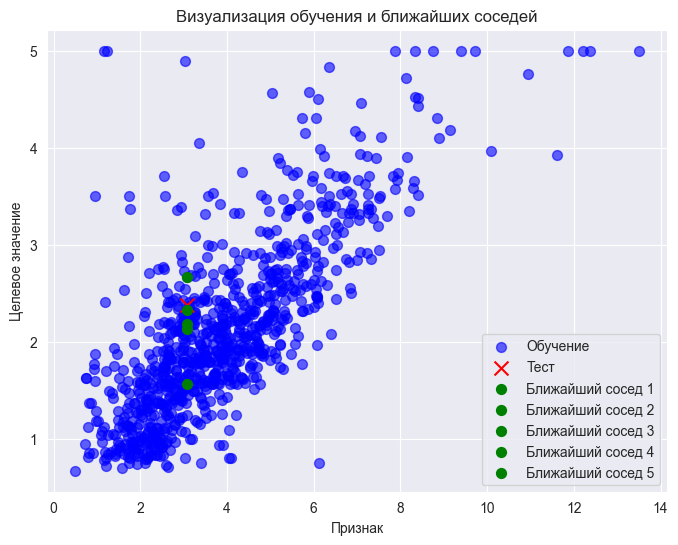

In [268]:
import matplotlib.pyplot as plt

k = 5
k_nearest_indices = np.argsort(distances)[:k]

plt.figure(figsize=(8, 6))
plt.scatter(
    X_train_array[:, 0], 
    y_train, 
    c='blue', 
    label='Обучение', 
    s=50, 
    alpha=0.6
)
plt.scatter(
    random_test_sample[0], 
    y_test[np.random.randint(0, len(X_test))], 
    c='red', 
    marker='x', 
    s=100, 
    label='Тест'
)

for i in range(k):
    plt.scatter(
        X_train_array[k_nearest_indices[0,i], 0], 
        y_train[k_nearest_indices[0,i]], 
        c='green', 
        marker='o', 
        s=50, 
        label=f'Ближайший сосед {i+1}'
    )

plt.legend()
plt.xlabel('Признак')
plt.ylabel('Целевое значение')
plt.title('Визуализация обучения и ближайших соседей')
plt.show()

In [269]:
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [270]:
n_pixels = data.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]


X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

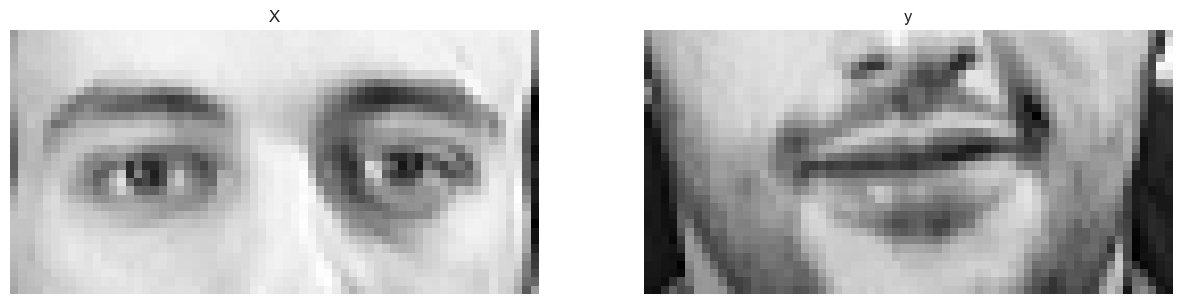

In [271]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx].reshape((32, 64)), cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx].reshape((32, 64)), cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [272]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [273]:
pred_test = {'knn': None,
             'weighted_knn': None,
             'weighted_knn_custom': None
             }

In [276]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_test['knn'] = knn.predict(X_test)

mse = mean_squared_error(y_test, pred_test['knn'])
mae = mean_absolute_error(y_test, pred_test['knn'])

print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Средняя абсолютная ошибка (MAE): {mae}')

Среднеквадратичная ошибка (MSE): 0.01594657078385353
Средняя абсолютная ошибка (MAE): 0.10018691420555115


In [277]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn = KNeighborsRegressor(n_neighbors=100, weights='distance')
weighted_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100, weights='distance')

In [279]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_test['weighted_knn'] = weighted_knn.predict(X_test)

mse = mean_squared_error(y_test, pred_test['knn'])
mae = mean_absolute_error(y_test, pred_test['knn'])
r2 = r2_score(y_test, pred_test['knn'])

print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Коэффициент детерминации (R^2): {r2:.2f}')

Среднеквадратичная ошибка (MSE): 0.02
Средняя абсолютная ошибка (MAE): 0.10
Коэффициент детерминации (R^2): 0.21


In [280]:
import numpy as np

def custom_distance_weight(distances):
    epsilon = 1e-6
    weights = 1.0 / (distances ** 2 + epsilon)
    return weights

In [281]:
from sklearn.neighbors import KNeighborsRegressor

weighted_knn_custom = KNeighborsRegressor(n_neighbors=100, weights=custom_distance_weight)
weighted_knn_custom.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom_distance_weight at 0x0000011A41E476D0>)

In [282]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred_test['weighted_knn_custom'] = weighted_knn.predict(X_test)

r2 = r2_score(y_test, pred_test['weighted_knn_custom'])

print(f'Коэффициент детерминации (R^2): {r2:.2f}')

Коэффициент детерминации (R^2): 0.24


In [283]:
ESTIMATORS = {'knn': knn,
              'weighted_knn': weighted_knn,
              'weighted_knn_custom': weighted_knn_custom}

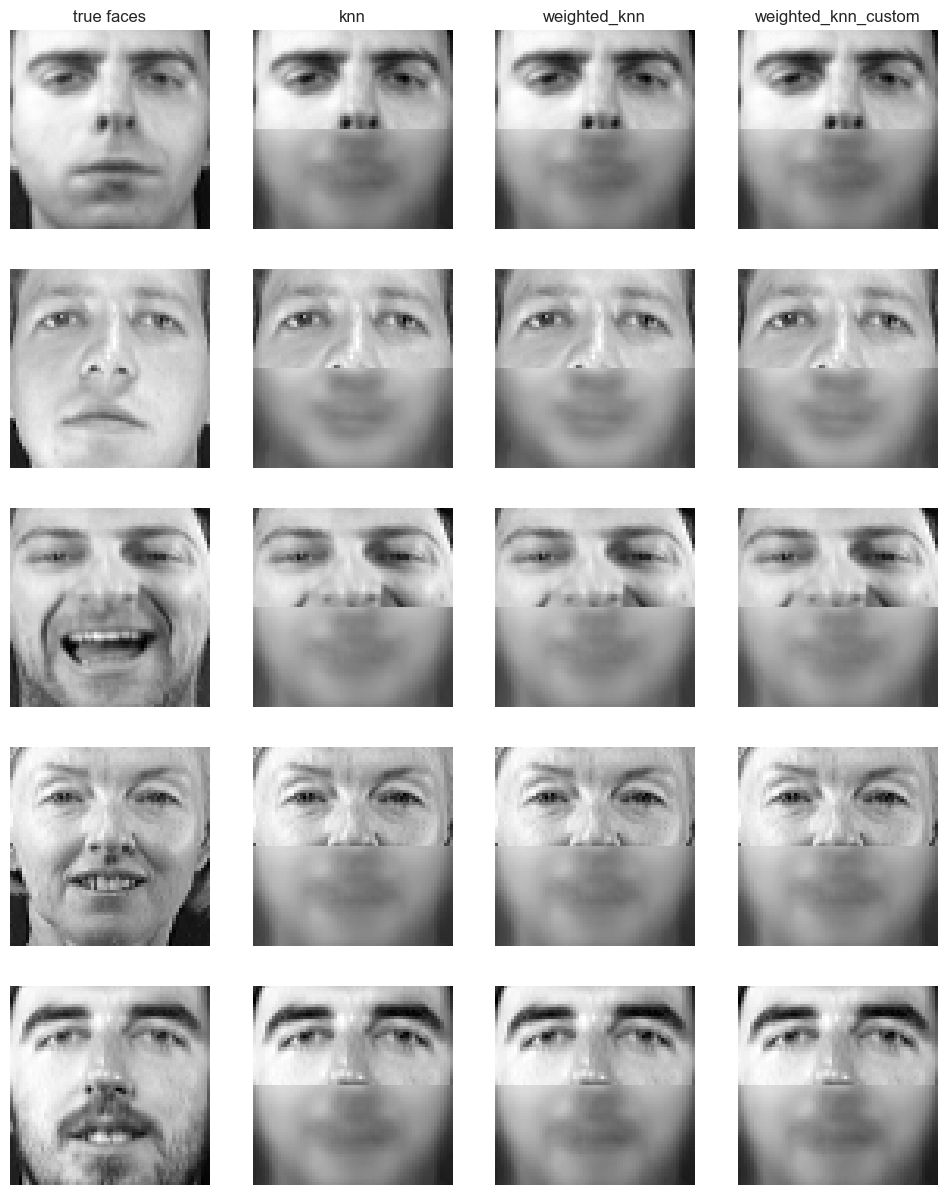

In [284]:
n_faces = 5
n_cols = 1 + len(ESTIMATORS)
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], pred_test[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


param_grid = {
    'n_neighbors': [2,3,5,7, 10,15, 20,25,30, 50, 100, 150, 200],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming'],
}


knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Лучшие гиперпараметры:", best_params)

best_knn_model = grid_search.best_estimator_
y_pred_best = best_knn_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f'Среднеквадратичная ошибка (MSE) лучшей модели: {mse_best:.2f}')
print(f'Средняя абсолютная ошибка (MAE) лучшей модели: {mae_best:.2f}')

Лучшие гиперпараметры: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Среднеквадратичная ошибка (MSE) лучшей модели: 0.01
Средняя абсолютная ошибка (MAE) лучшей модели: 0.07


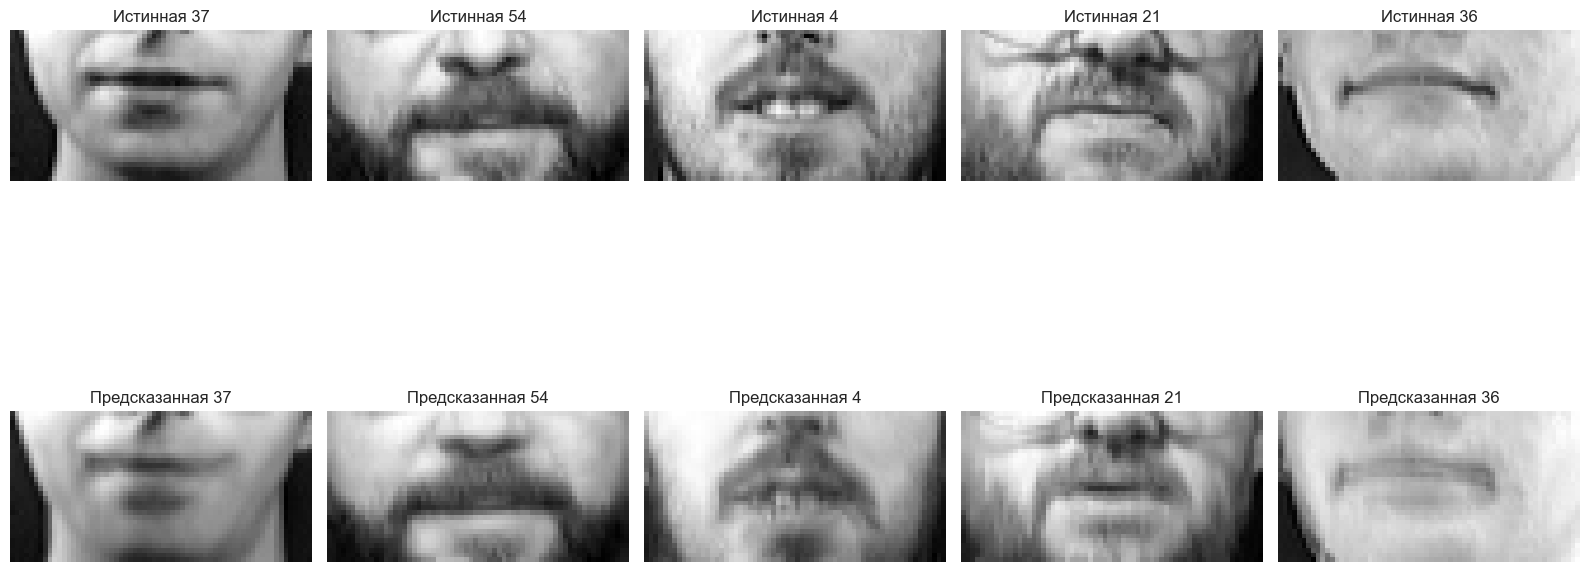

In [287]:
import matplotlib.pyplot as plt

y_pred_best = best_knn_model.predict(X_test)
random_test_indices = np.random.choice(X_test.shape[0], 5, replace=False)

plt.figure(figsize=(16, 10))
for i, index in enumerate(random_test_indices):
    original_lower = y_test[index].reshape(32, 64)  # Нижняя часть лица
    predicted_lower = y_pred_best[index].reshape(32, 64)  # Предсказанная нижняя часть лица

    plt.subplot(2, 5, i + 1)
    plt.imshow(original_lower, cmap='gray')
    plt.title(f"Истинная {index}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(predicted_lower, cmap='gray')
    plt.title(f"Предсказанная {index}")
    plt.axis('off')

plt.tight_layout()
plt.show()